# Exoplanet data

Data source: http://exoplanet.eu/catalog/ 

The data is maintained by the Observatoire de Paris 

5506 planets / 4064 planetary systems / 878 multiple planet systems.



In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy import units as u
from reproject import reproject_interp
import csv
from astropy.io import ascii
import pandas as pd

In [2]:
!ls

In [3]:
data = pd.read_csv('exoplanet.eu_catalog.csv')


In [4]:
data

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,16.1284,1.53491,1.53491,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.00,3.00,3.00,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,NaN,NaN,NaN,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,NaN,NaN,NaN,4.6840,0.23000,0.23000,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,NaN,NaN,NaN,NaN,4.95000,4.95000,NaN,NaN,...,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,ups And c,Confirmed,9.10,2.93,5.04,1.8000,0.26000,0.26000,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
5502,ups And d,Confirmed,23.58,2.29,2.93,10.1900,NaN,NaN,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
5503,ups And e,Confirmed,NaN,NaN,NaN,1.0590,0.02800,0.02800,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
5504,ups Leo b,Confirmed,NaN,NaN,NaN,0.5100,0.26000,0.08000,NaN,NaN,...,G9 III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.keys()

Index(['# name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'im

## Mass vs. radius

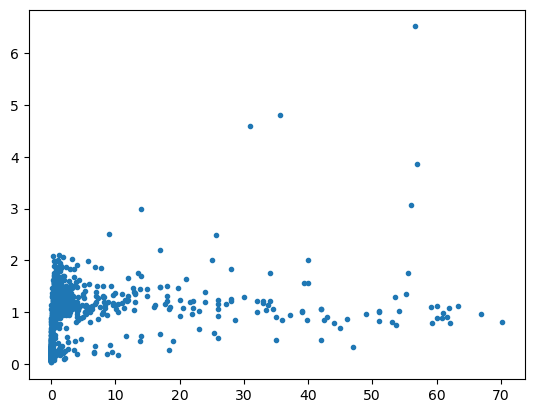

In [9]:
plt.plot(data['mass'], data['radius'], marker = '.', linestyle='')

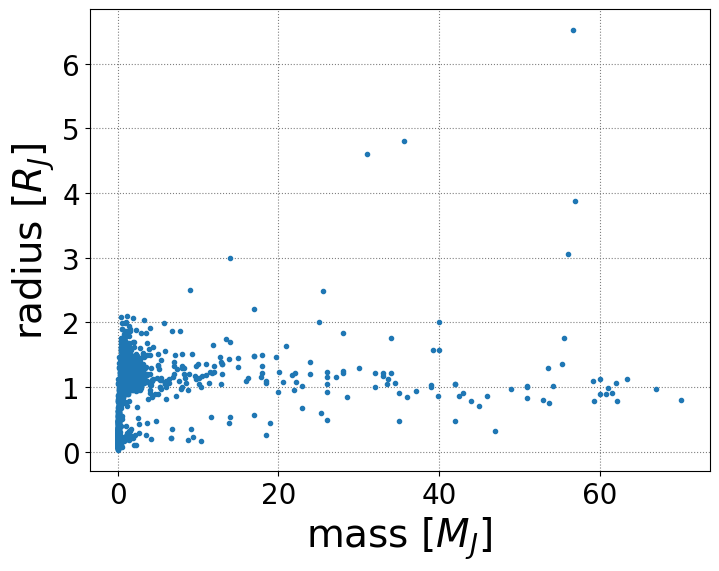

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['mass'], data['radius'], marker = '.', linestyle='')
plt.xlabel("mass [$M_J$]", fontsize=28)
plt.ylabel('radius [$R_J$]', fontsize=28)

#plt.xlim(-300,600)
#plt.ylim(0,1.02)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()


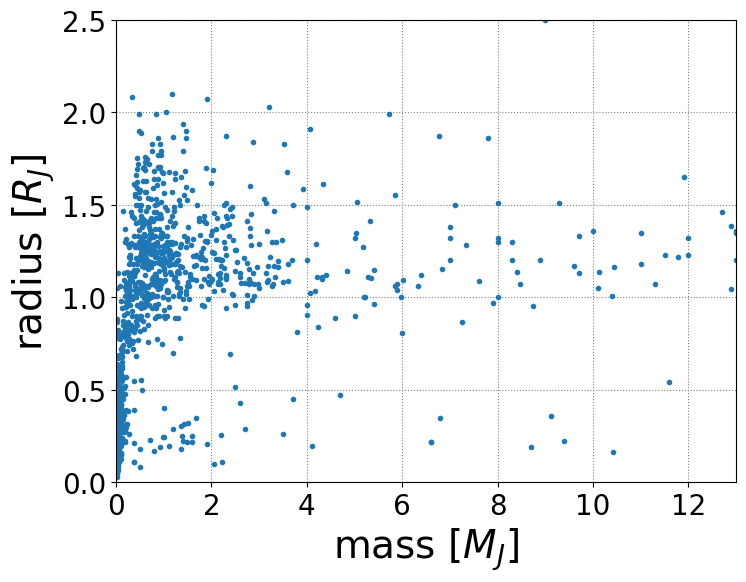

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['mass'], data['radius'], marker = '.', linestyle='')
plt.xlabel("mass [$M_J$]", fontsize=28)
plt.ylabel('radius [$R_J$]', fontsize=28)

plt.xlim(0.00,13)
plt.ylim(0,2.5)  
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('./test.png', dpi=200)

## Histograms

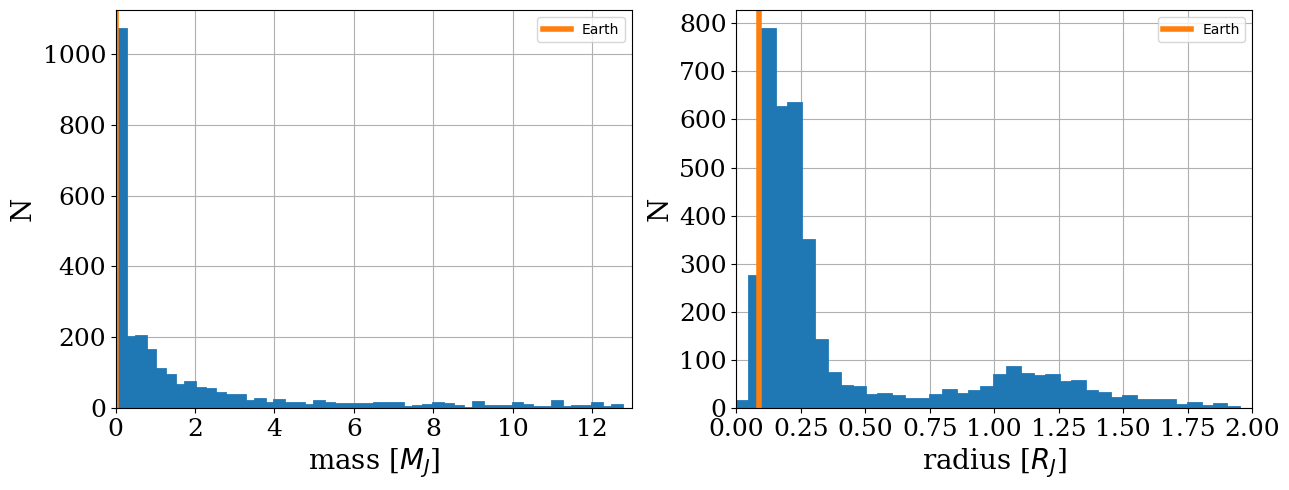

In [12]:
fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,2,1)
d = data['mass']
bin_size = np.arange(0,13,0.25) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(1/317.83, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax1.set_xlabel('mass [$M_J$]', size=20,family='serif')
ax1.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.legend()
plt.xlim(0.00,13)
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
d = data['radius']
bin_size = np.arange(0,2, 0.05) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(0.0892147, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax2.set_xlabel('radius [$R_J$]', size=20,family='serif')
ax2.set_ylabel('N', size=20,family='serif')
plt.legend()
plt.grid(True)
plt.xlim(0.00,2)
plt.tight_layout()

plt.show()

## Orbital period vs mass

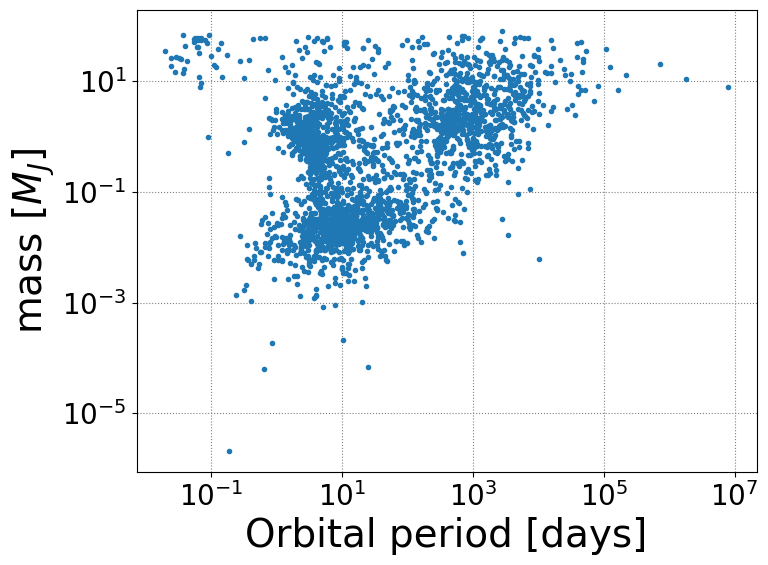

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['orbital_period'], data['mass'], marker = '.', linestyle='')
plt.xlabel("Orbital period [days]", fontsize=28)
plt.ylabel('mass [$M_J$]', fontsize=28)
ax.set_xscale('log')
ax.set_yscale('log')
#plt.xlim(-300,600)
#plt.ylim(0,13)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

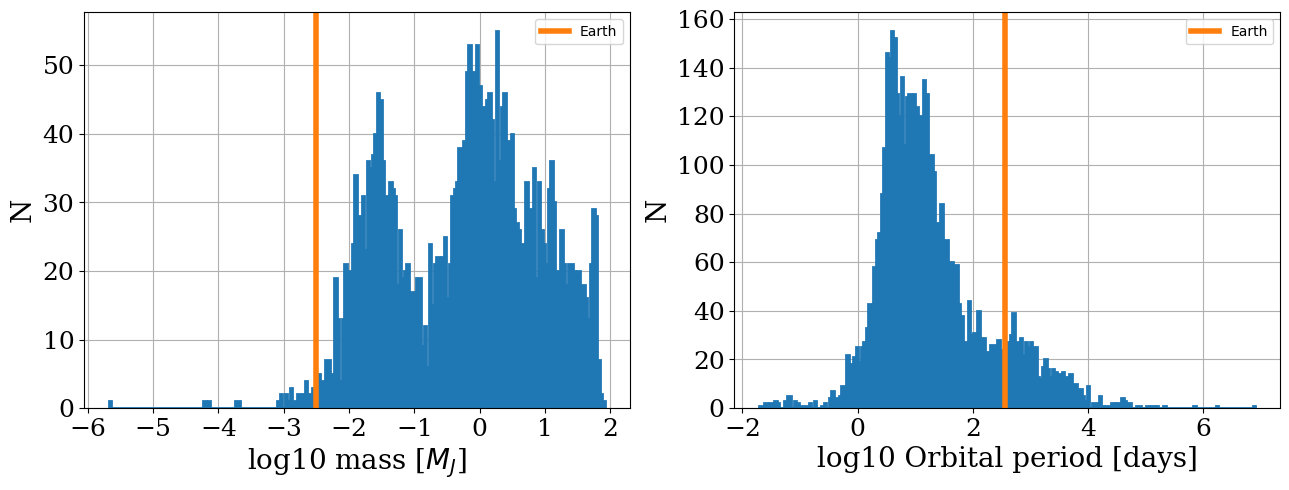

In [14]:
fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,2,1)
d = np.log10(data['mass'])
plt.hist(d, bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(np.log10(1/317.83), color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax1.set_xlabel('log10 mass [$M_J$]', size=20,family='serif')
ax1.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.legend()
#plt.xlim(0.00,13)
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
d = np.log10(data['orbital_period'])
plt.hist(d, bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(np.log10(365), color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax2.set_xlabel('log10 Orbital period [days]', size=20,family='serif')
ax2.set_ylabel('N', size=20,family='serif')
plt.legend()
plt.grid(True)
#plt.xlim(0.00,1)
plt.tight_layout()

plt.show()